### Importing the libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

#Libraries for the preprocessing process
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Scaling
from sklearn.preprocessing import StandardScaler

# K-Medoid clustring
from sklearn_extra.cluster import KMedoids 

#Hierarchial clustring
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


### import the Dataset 

In [75]:
#reading the csv file 
df=pd.read_csv('Credit Card Customer Data (1).csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Data assessing

In [76]:
df.shape

(660, 7)

In [77]:
#num of null values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [78]:
#are there any duplications 
df.duplicated().sum()

0

In [79]:
#check the Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [80]:
#Show statistical measures
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


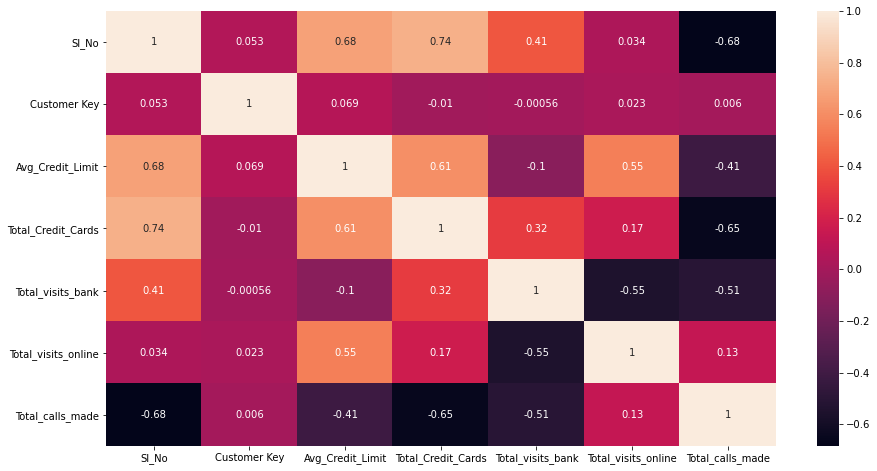

In [81]:
#making the correlation matrix
plt.figure(figsize=(15,8))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Findings

- There is no missing values
- There is no duplications
- Customer Key should be a string
- there is a correlation between Total_Credit_Cards and Avg_Credit_Limit and also between Total_Credit_Cards and       Total_calls_made but these correlations are not significant so, we will keep the columns without removing

## Data cleaning

In [82]:
#Change CustomerId Datatype to string
df['Customer Key']=df['Customer Key'].astype('str')

In [83]:
#check the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sl_No                660 non-null    int64 
 1   Customer Key         660 non-null    object
 2   Avg_Credit_Limit     660 non-null    int64 
 3   Total_Credit_Cards   660 non-null    int64 
 4   Total_visits_bank    660 non-null    int64 
 5   Total_visits_online  660 non-null    int64 
 6   Total_calls_made     660 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 36.2+ KB


In [84]:
#showing the first five row in data
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [85]:
# needed features
data = df.iloc[:,2:].values

In [86]:
#scaled the data 
sc=StandardScaler()
scaled_features = sc.fit_transform(data)


## Visualizations Process

##  This is a Pairplot to show the relations between the data

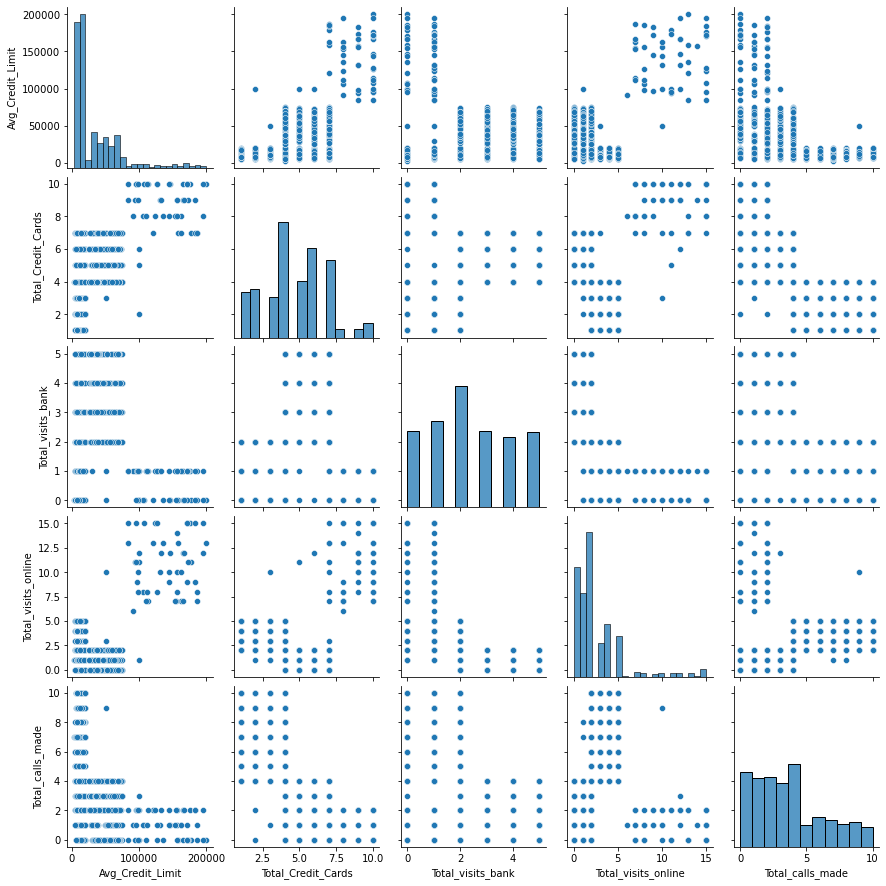

In [87]:
Data = df.drop(['Sl_No','Customer Key'],axis=1).copy()
sn.pairplot(Data)

### The Key Observations we extract and noticed from the data is below and the relation between every two feature  in the data

### Total_Credit_Cards with Avg_Credit_Limit

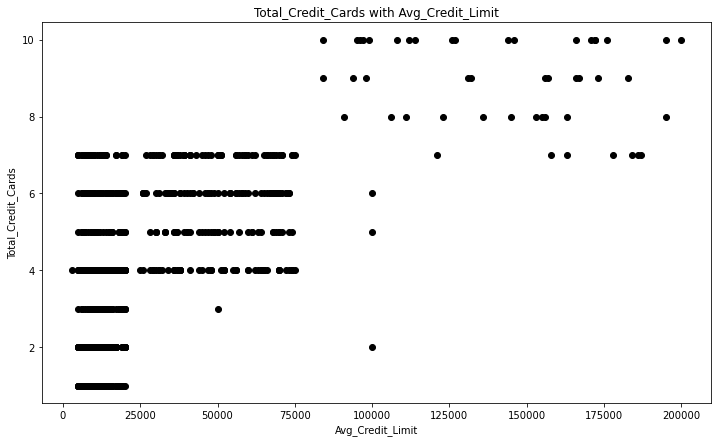

In [88]:
x = df.Avg_Credit_Limit
y = df.Total_Credit_Cards
plt.figure(figsize=(12,7))
plt.title('Total_Credit_Cards with Avg_Credit_Limit')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')
plt.scatter(x,y, marker='o',color='black') 

- Here we have two clusters : Customers with Average Credit Limit < 100000 And Customers with Average Credit Limit < 75000

### Avg_Credit_Limit vs Total_visits_bank

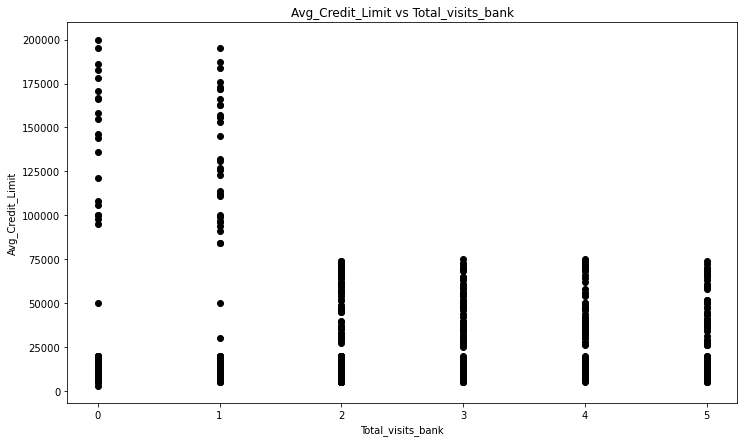

In [89]:
y = df.Avg_Credit_Limit
x = df.Total_visits_bank
plt.figure(figsize=(12,7))
plt.title('Avg_Credit_Limit vs Total_visits_bank')
plt.ylabel('Avg_Credit_Limit')
plt.xlabel('Total_visits_bank')
plt.scatter(x,y, marker='o',color='black') 


- Here we have two clusters : Customers with  Average Credit Limit > ~ 75000 who visit the bank mostly 0 or 1 times  And Customers with Average Credit Limit < ~ 75000 who visit the bank mostly between 2 and 5 times 

### Avg_Credit_Limit with Total_visits_online

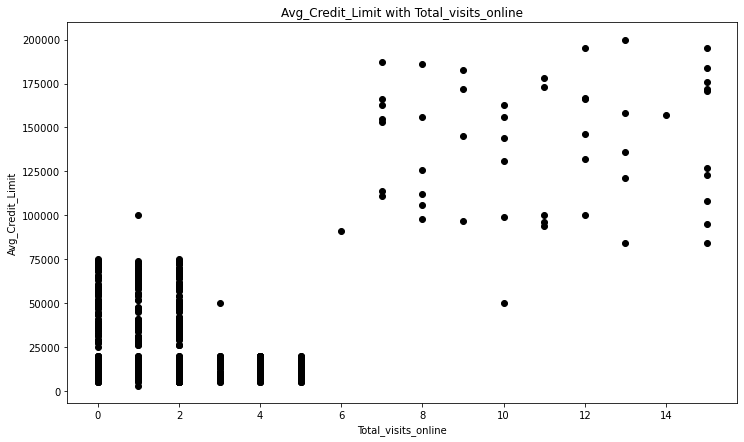

In [90]:
x = df.Total_visits_online
y = df.Avg_Credit_Limit
plt.figure(figsize=(12,7))
plt.title('Avg_Credit_Limit with Total_visits_online')
plt.xlabel('Total_visits_online')
plt.ylabel('Avg_Credit_Limit')
plt.scatter(x,y, marker='o',color='black') 

- Here we have two clusters : Customers with  Average Credit Limit > ~ 75000 who visit the bank online mostly more than 7  times And Customers with Average Credit Limit < ~ 75000 who visit the bank online mostly less than 7 times  


### Avg_Credit_Limit with Total_calls_made

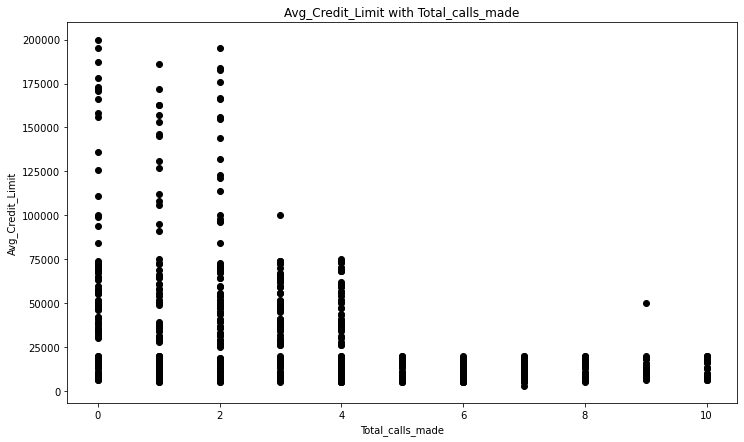

In [91]:
x = df.Total_calls_made
y = df.Avg_Credit_Limit
plt.figure(figsize=(12,7))
plt.title('Avg_Credit_Limit with Total_calls_made')
plt.xlabel('Total_calls_made')
plt.ylabel('Avg_Credit_Limit')
plt.scatter(x,y, marker='o',color='black') 

- Here we have two clusters : customers with (Avg_Credit_Limit) > 60,000 make fewer calls mostly equal between 0 and 2.5 calls and The customers with (Avg_Credit_Limit) < 50,000 make many calls mostly equal between 2.5 and 10 calls

### Total_Credit_Cards with Total_visits_online 

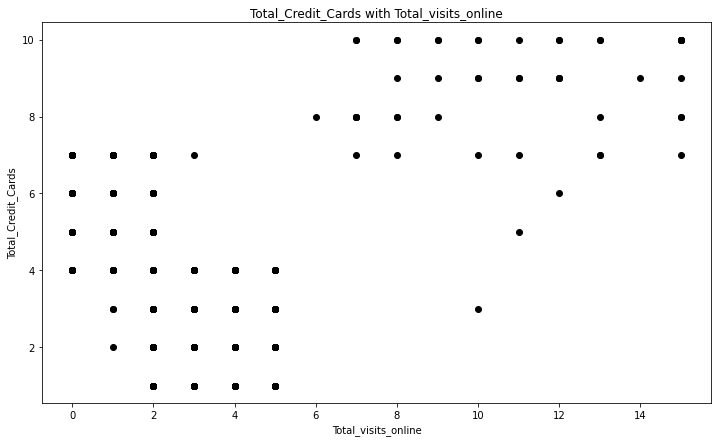

In [92]:
x = df.Total_visits_online
y = df.Total_Credit_Cards
plt.figure(figsize=(12,7))
plt.title('Total_Credit_Cards with Total_visits_online')
plt.xlabel('Total_visits_online')
plt.ylabel('Total_Credit_Cards')
plt.scatter(x,y, marker='o',color='black') 

- Here we have two clusters :Customers with more than 7 credit cards and with Average Limit > ~ 80000 visit online more frequently and customers with less than 7 credit cards and with Average Limit < ~ 80000 visit online less

### Total_Credit_Cards with Total_calls_made

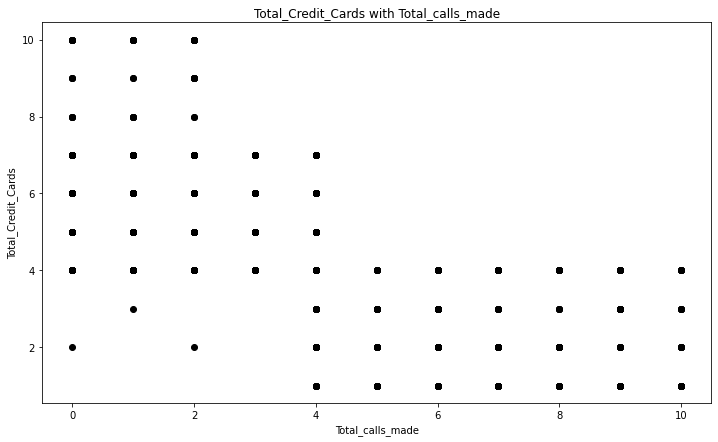

In [93]:
x = df.Total_calls_made
y = df.Total_Credit_Cards
plt.figure(figsize=(12,7))
plt.title('Total_Credit_Cards with Total_calls_made')
plt.xlabel('Total_calls_made')
plt.ylabel('Total_Credit_Cards')
plt.scatter(x,y, marker='o',color='black') 

- Here we have two clusters :Customers with 1-4 Credit Cards make more than 5 calls (5-10) and customers with 4-10 credit make less than 5 calls (1-5)


### Total_visits_online with Total_calls_made

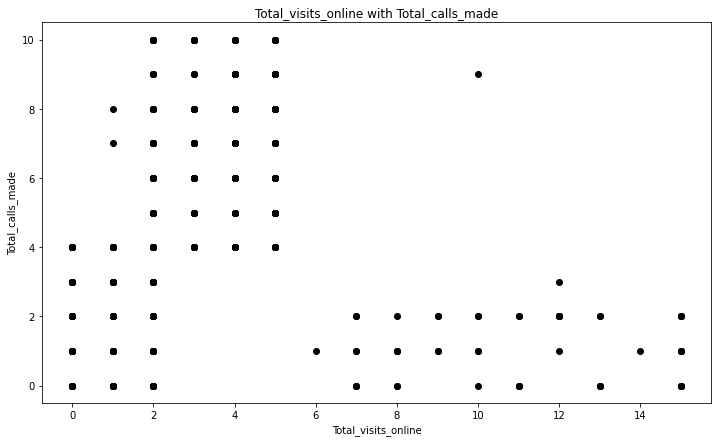

In [94]:
x = df.Total_visits_online
y = df.Total_calls_made
plt.figure(figsize=(12,7))
plt.title('Total_visits_online with Total_calls_made')
plt.xlabel('Total_visits_online')
plt.ylabel('Total_calls_made')
plt.scatter(x,y, marker='o',color='black') 

- Here we have two clusters :Customers who visit less frequently online make more phone calls and customers which there Average limit is more than 80000 make more frequent online visits  

### We want to know the relation between the total interactions and the Avg_Credit_Limit for the customer Thus, we wil create a new feature with total interaction with banks 

### Total_interactions with Avg_Credit_Limit

In [95]:
#Copying the dataset into a new memory
copied_data=df.copy() 
copied_data['Total_interactions'] = copied_data['Total_visits_bank'] + copied_data['Total_visits_online'] + copied_data['Total_calls_made']

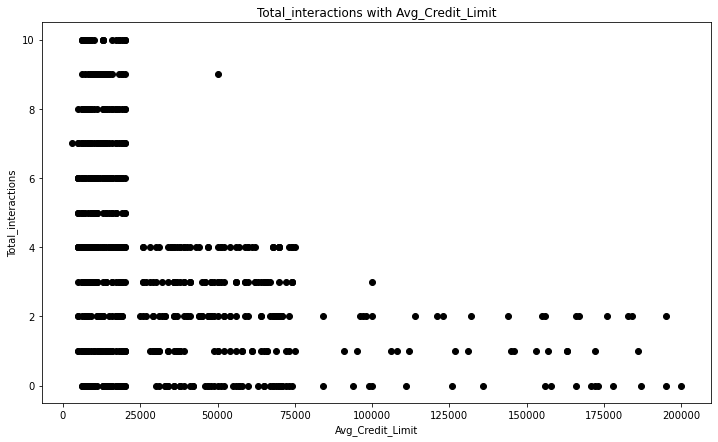

In [96]:
x = copied_data.Avg_Credit_Limit
y = copied_data.Total_calls_made
plt.figure(figsize=(12,7))
plt.title('Total_interactions with Avg_Credit_Limit')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_interactions')
plt.scatter(x,y, marker='o',color='black') 

### we  can segment the customers based on the there total interactions or complaints with bank and there average credit limit 

### K-medoids clusering

In [97]:
#create object from KMedoids class
cluster = KMedoids(n_clusters=3, metric="manhattan",init="random",random_state=40) #random_state=50
y_kmedoids = cluster.fit_predict(data)

### Scattering for K-medids clusering

Text(0, 0.5, 'Total_Credit_Cards')

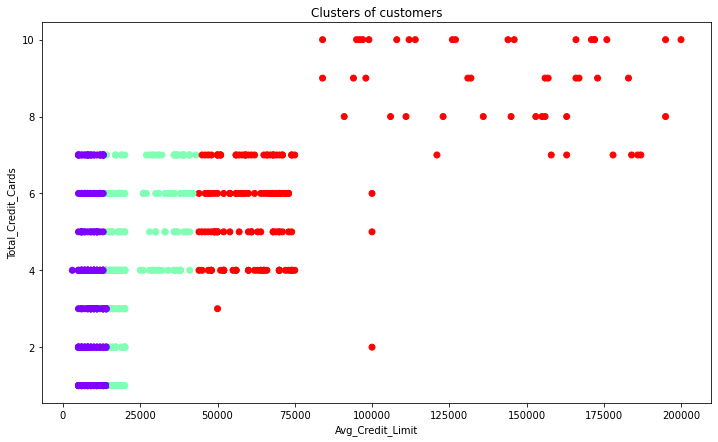

In [98]:
#scattering data
plt.figure(figsize=(12,7)) 
plt.scatter(data[:,0],data[:,1],c=cluster.labels_, cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')

### We will create a customer segmentation with K-medoids

In [99]:
#Converting the cluster to data frame
Segment = pd.DataFrame(y_kmedoids,columns=['Segment']) 
Segment

,Segment
0,2
1,2
2,2
3,1
4,2
...,...
655,2
656,2
657,2
658,2


In [100]:
data_c = df.copy()
data_c = pd.concat([data_c,Segment],axis=1)
data_c

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Segment
0,1,87073,100000,2,1,1,0,2
1,2,38414,50000,3,0,10,9,2
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,2
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


In [101]:
Thefeatures = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

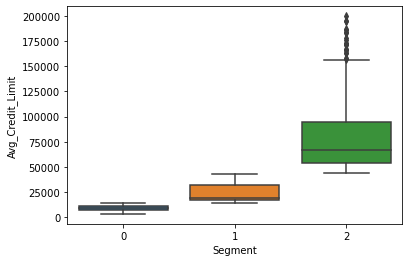

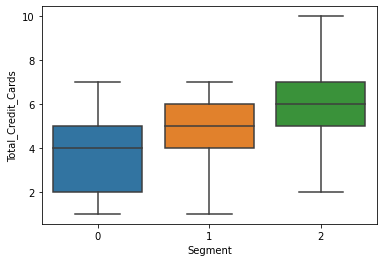

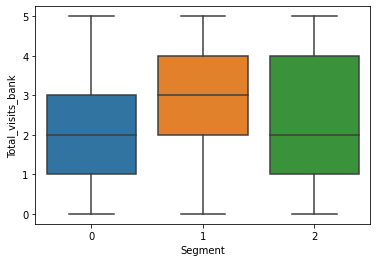

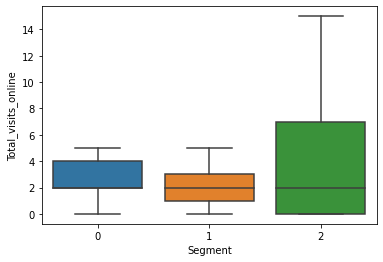

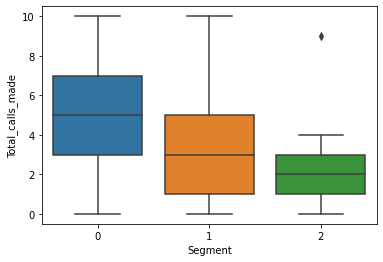

In [102]:
#Loop to plot boxplot of each cluster
for feature in Thefeatures: 
    sn.boxplot(x='Segment',y=feature,data=data_c)
    plt.show()

### Two types Dendrograms for the scaled feature data

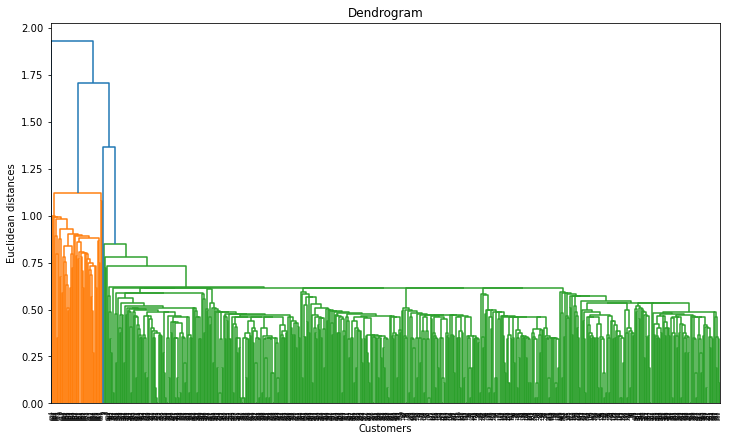

In [103]:
plt.figure(figsize=(12,7)) 
dendrogram= sch.dendrogram(sch.linkage(scaled_features,'single'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

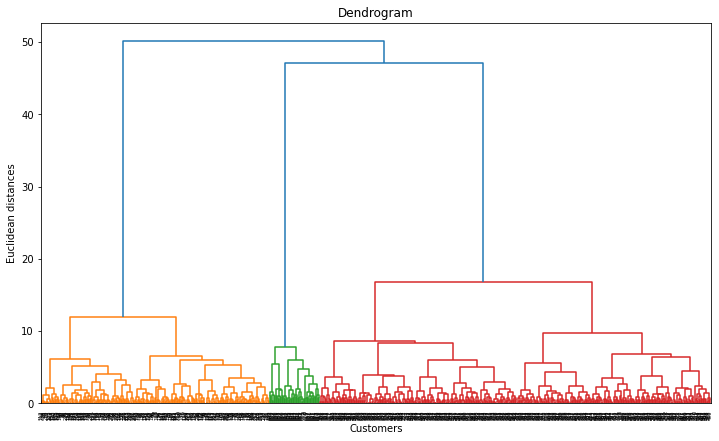

In [104]:
plt.figure(figsize=(12,7)) 
dendrogram= sch.dendrogram(sch.linkage(scaled_features,'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Agglomerative clustering 

In [105]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='single')
y_hc = cluster.fit_predict(data)

### Scattering for agglomerative clustering 

Text(0, 0.5, 'Total_Credit_Cards')

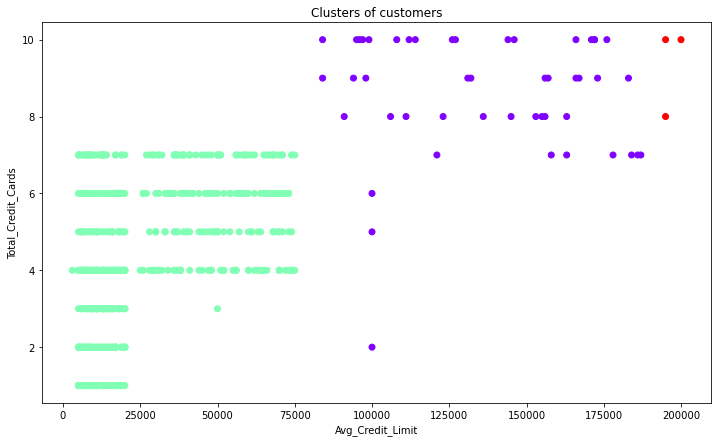

In [106]:
plt.figure(figsize=(12,7)) 
plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Clusters of customers')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')

### We will create a customer segmentation with hierarchical clustering(agglomerative clustering)

In [107]:
#Converting the cluster to data frame
df_hc= pd.DataFrame(y_hc,columns=['Hcluster']) 
df_hc

,Hcluster
0,0
1,1
2,1
3,1
4,0
...,...
655,0
656,0
657,0
658,0


In [108]:
data_c = df.copy()
data_c = pd.concat([data_c,df_hc],axis=1)
data_c

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Hcluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,0
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,0
656,657,60732,84000,10,1,13,2,0
657,658,53834,145000,8,1,9,1,0
658,659,80655,172000,10,1,15,0,0


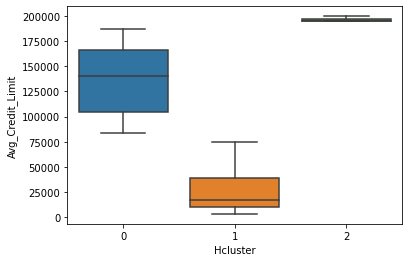

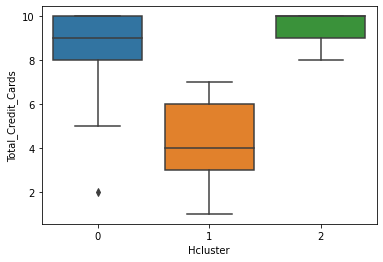

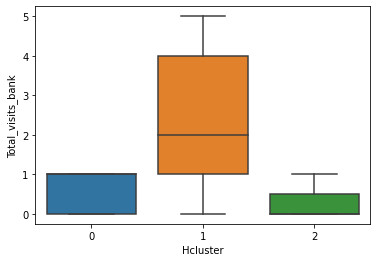

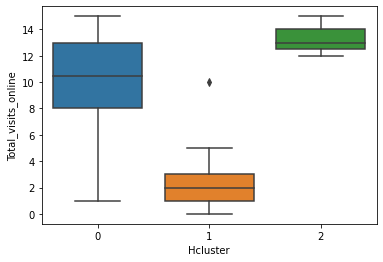

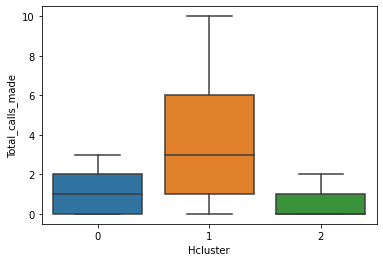

In [109]:
#Loop to plot boxplot of each cluster
for feature in Thefeatures: 
    sn.boxplot(x='Hcluster',y=feature,data=data_c)
    plt.show()

### We will calculate avg silhoutte scores to know which type of cluster is better 

In [110]:
from sklearn.metrics import silhouette_score

In [111]:
#k-medoid score 
kmedoid_score= silhouette_score(scaled_features,y_kmedoids)
kmedoid_score

0.04394700238488027

In [112]:
#hc score 
HC_score= silhouette_score(scaled_features,y_hc)
HC_score

0.5208580575976477

### The HC_score is greater than kmedoid_score

- Its analysis is as follows −

- +1 Score − Near +1 Silhouette score indicates that the sample is far away from its neighboring cluster.

- 0 Score − 0 Silhouette score indicates that the sample is on or very close to the decision boundary separating two neighboring clusters.

- -1 Score − 1 Silhouette score indicates that the samples have been assigned to the wrong clusters.

## Comparing the clusters

- Overall for this dataset Agglomerative Clustering has given better results. The silhoutte score of kmedoids and Hierarchical Cluster are 0.04394700238488027 and 0.5208580575976477 respectively HC has higher silhoutte score.

### K-medoids Clusters Observations:



- IN Segment 0:

-Customers have low credit limit and more number of total credit cards and this maybe indicate to that they have high credit usage and low income. 

-They make complaints by the medium of phone calls.

-We suggest that the bank can arrange periodical feedback phone calls from Relationship Managers at the bank

-They can be targeted for cross selling by the medium of phone calls

- IN Segment 1:

-Customers have less number of phone calls

-They have highest number of online visits

-They does not visit the bank at all

-This maybe indecate to that the Segment 1 is literate and premium customers of the bank with higher income.

-Luxury offers through emails and offers related to online shopping or coupons can be targeted to this segment They have the potential of being most profitable customers


- IN Segment 2 have almsot similar characterstics:

-Median of 3 visits to the bank

-Relatively higher visits to the bank

-holds 4-6 Total Credit Cards

-Both can targeted for cross selling through in bank managers and promotional advertisements in the bank

-Servicescape Promotions are Promotions done in the environment where the service is offered



### Hierarchial Clusters Observations

- IN Cluster 0

-highest number of phone calls made

-Less online presence/visits

-high number of visits to the bank

-low limit

-lowest number of cards

-We suggest that The cluster 0 should be targeted through phone calls with Relationship Managers and cross selling through phone calls



- IN Cluster 1

-medium number of calls made

-lowest online visits

-More number of visits in the bank

-medium limit and cards

-We suggest that Customers in Cluster 1 should be targeted for cross selling through banks branches



- INCluster 2

-lowest number of calls made

-highest online visits

-negligible number of visits in the bank

-high limit and cards

-Platinum tier customers

-Affluent and premium customers are present in cluster 2.They should be targeted through loyalty programs and luxury offers

-We suggest that Cluster 0 and Cluster 1 should be targeted to cover the operational costs and Cluster 2 should be targeted to reap profits